In [43]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [95]:
with open("../data/dataUsEtf.txt") as f:
    li = f.read().splitlines()
    li = [ list(i.split(', ')) for i in li]
    li = [ [i[0], i[1], 0, 0] for i in li]

In [96]:
for i, j in enumerate(li):
    res = requests.get('https://www.bloomberg.co.jp/quote/'+ j[0] +':US')
    # レスポンスの HTML から BeautifulSoup オブジェクトを作る
    soup = BeautifulSoup(res.text, 'html.parser')
    y = soup.find("div", class_ = "price")
    li[i][2] = y.get_text()
    li[i][3] = int(li[i][1]) * float(li[i][2])

In [103]:
li = np.array(li)
li

array([['IVV', '3', '425.760', '1277.28'],
       ['QQQ', '3', '344.51', '1033.53'],
       ['VWO', '6', '54.88', '329.28000000000003'],
       ['VYM', '3', '106.86', '320.58'],
       ['VXUS', '4', '67.50', '270.0'],
       ['IEMG', '2', '67.3200', '134.64'],
       ['VTWO', '1', '93.42', '93.42'],
       ['VGK', '1', '70.35', '70.35'],
       ['BND', '3', '85.60', '256.79999999999995'],
       ['TLT', '3', '141.220', '423.65999999999997'],
       ['LQD', '1', '133.180', '133.18'],
       ['GLD', '2', '174.710', '349.42'],
       ['GLDM', '1', '18.57', '18.57']], dtype='<U18')

In [105]:
x = li[:,3]
y = li[:,0]

In [106]:
c_cycle=["#3498db","#51a62d","#1abc9c","#9b59b6","#f1c40f",
         "#7f8c8d","#34495e","#446cb3","#d24d57","#27ae60",
         "#663399","#f7ca18","#bdc3c7","#2c3e50","#d35400",
         "#9b59b6","#ecf0f1","#ecef57","#9a9a00","#8a6b0e"][:len(x)]

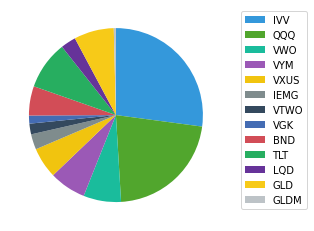

In [107]:
plt.pie(x, labels=y, startangle=90, counterclock=False, labeldistance=None, colors=c_cycle)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()